# Guide to Plotting Data

There are many visualization choices out there, this notebook is designed to help you select the right one for your data.

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [12]:
df = sns.load_dataset('titanic')

In [13]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### NOTICE: df.descibe only shows continuous columns

In [15]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Histograms for continuous columns

Should be used with continuous columns to see distribution and ranges

<AxesSubplot:>

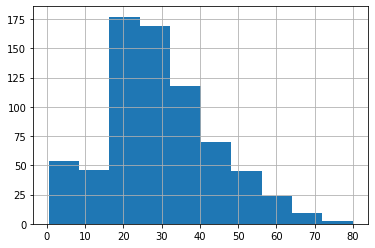

In [18]:
df['age'].hist()

<AxesSubplot:xlabel='age', ylabel='Count'>

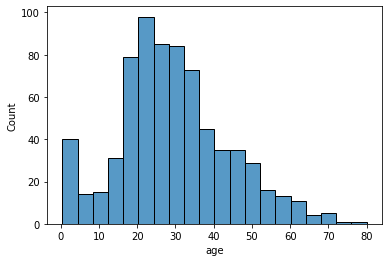

In [33]:
sns.histplot(df['age'])

In [20]:
continuous_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

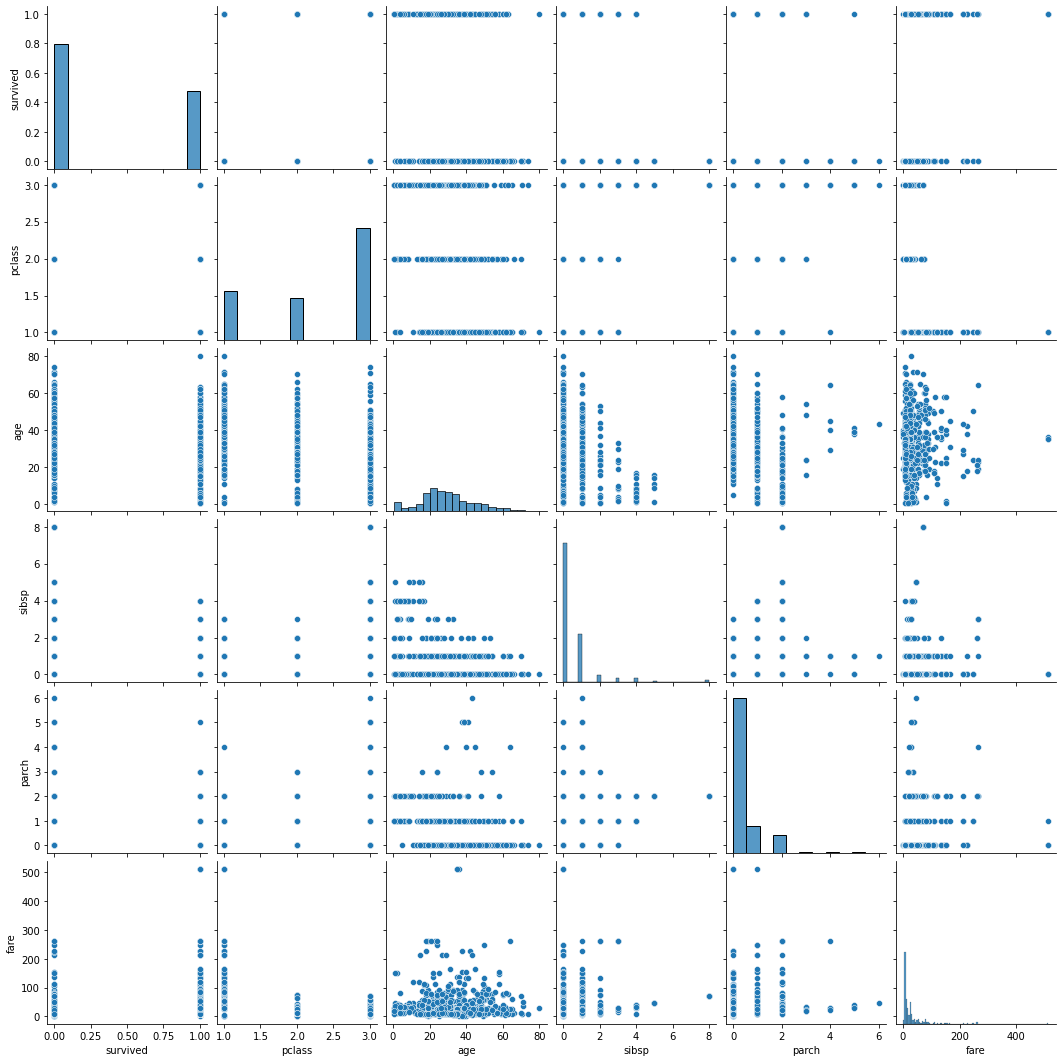

In [21]:
## Select which columns to use and plot hists and scatters 
sns.pairplot(df[continuous_vars])

## Violin Plots

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

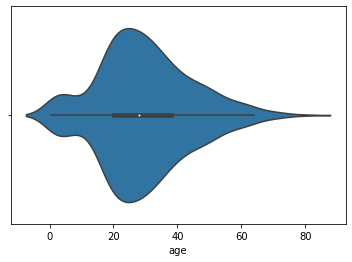

In [23]:
sns.violinplot(df['age'])

<AxesSubplot:xlabel='survived', ylabel='age'>

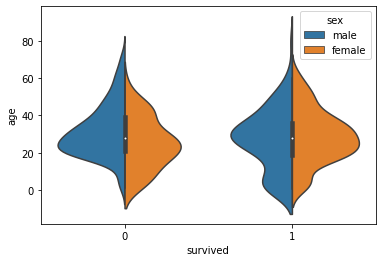

In [32]:
sns.violinplot(data=df, x='survived', hue='sex', y='age', split=True)

### Boxplots

Used to identify outliers in continuous data

<AxesSubplot:>

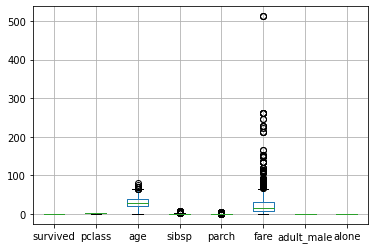

In [36]:
# NOTE: Only plots continuous data
df.boxplot()

<AxesSubplot:xlabel='fare'>

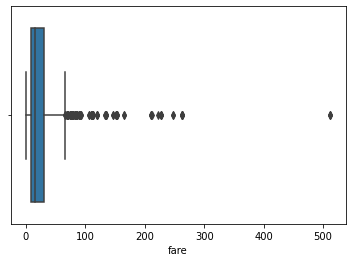

In [38]:
sns.boxplot(data=df, x='fare')

### Barplot

Useful for combining categorical with continuous data

<AxesSubplot:xlabel='sex'>

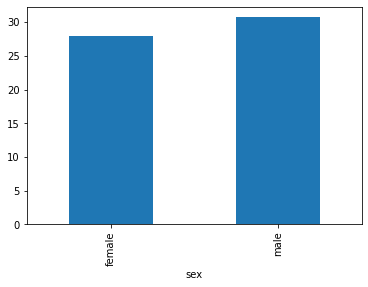

In [45]:
df.groupby('sex')['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='pclass'>

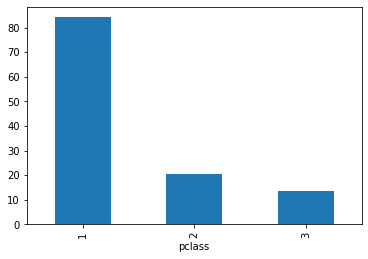

In [47]:
df.groupby('pclass')['fare'].mean().plot(kind='bar')

<AxesSubplot:xlabel='pclass', ylabel='age'>

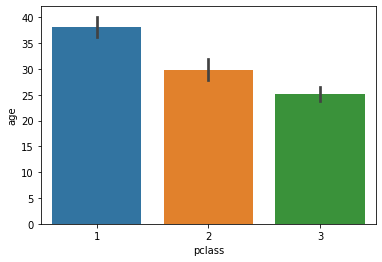

In [48]:
sns.barplot(data=df, x='pclass', y='age')

<AxesSubplot:xlabel='sex', ylabel='fare'>

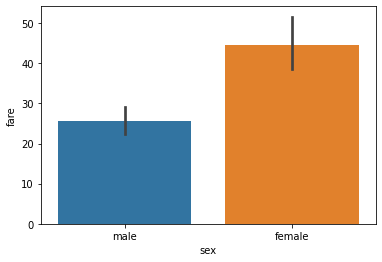

In [49]:
sns.barplot(data=df, x='sex', y='fare')

### Scatterplot

For showing relationship between two continuous variables

<AxesSubplot:xlabel='fare', ylabel='age'>

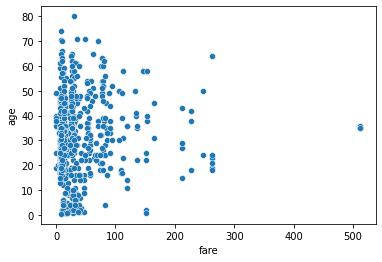

In [51]:
sns.scatterplot(data=df, x='fare', y='age')

### Correlation Heatmap

<AxesSubplot:>

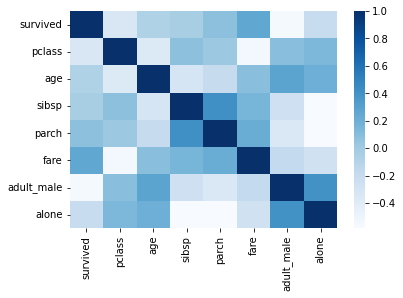

In [55]:
# NOTICE it only shows for numerical variables
sns.heatmap(df.corr(), cmap='Blues')